# Digit recognition

We will try and compare a few machine learning classification algorithms on a well studied problem set. The MNIST dataset is a set of images of hadwritten digits 0-9. More details can be found on Kaggle https://www.kaggle.com/c/digit-recognizer

### MNIST Dataset

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every ImageId in the test set, you should predict the correct label.
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

### Data representation

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training dataset, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

The index to the pixel on row i and column j of these 28 x 28 matrices is given by x = i * 28 + j, where i and j are integers between 0 and 27, inclusive.

The test dataset, (test.csv), is the same as the training set, except that it does not contain the "label" column.

The training dataset contains 42000 and the test dataset contains 28000 entries.

### Classification algorithms

We will train and compare the performance of Random Forests, Support Vector Machines, and Nearest Neighbors classifiers using the scikit-learn library.

We will use the 28x28=784 dimensional vectors in the intensity space as features in all three cases.

### Python modules

All the classifiers are imported from scikit-learn. 
We will also import csv inorder to read and access the csv data files.
For visualization, we will use numpy and matplotlib.

In [69]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Preparing data

We use python cvs module to load the csv data files.

The MNIST csv files are in the following format:
digit label, pixel_r1_c1, pixel_r1_c2, ...

We do not use the test dataset since test.csv doesn't have the label field. Instead, we will split the training set into a training and a validation set to evaluate the performance.

As the dataset is rather large (42000 training entries), we split the training set and set aside 1/10th of the training data for validation.

In [197]:
# A helper class to load the MNIST train/test data/label and to visualize them
class mnist:
    # We'll do everything in the class constructor routine
    # basedirectory: The directory containing train.csv
    def __init__(self,basedirectory):
        # our prior knowledge
        self.height = 28
        self.width = 28
        # data placeholder
        data = []
        label = []
        
        # We can use python with statement to open a file, process its contents, and make sure it's closed
        with open(basedirectory+'train.csv', 'r') as csv_file:
            # read and discard the csv header row (first line)
            next(csv_file)
            # Read the rest, one line at a time
            for line in csv.reader(csv_file):
                # Separating the image data from the labels
                # The first column is the label                
                label.append(int(line[0]))
                # The rest of columns are pixels
                pixels = line[1:]
                # We also normalize the pixel intensities between [0,1]
                data.append( np.array(pixels, dtype='float32')/255. )
        # Spliting the training data into training and validation sets
        # We'll use the cross_validation from the sklearn module
        Xtrain,Xval,ytrain,yval = cross_validation.train_test_split(data,label,test_size=0.1)
        # make the data public
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        self.Ntrain = len(Xtrain)
        self.Xval = Xval
        self.yval = yval
        self.Nval = len(Xval)
     
    # Displays N images for each digit from the training set
    def demo(self,N):
        # keeps track of the number of plotted images for each digit
        nplot = np.zeros(10)
        # Go through all images
        for n in range(self.Ntrain):        
            # get the digit label
            digit = self.ytrain[n]
            # Check the number of plotted images for the digit
            if nplot[digit] < N:
                nplot[digit] = nplot[digit] + 1
                # read and reshape the digit image
                img = self.Xtrain[n].reshape((self.height,self.width))
                # compute the subplot id
                plotID = N * digit + nplot[digit]
                # plot
                plt.subplot(10,N,plotID),plt.imshow(img, cmap='gray')
                plt.xticks([]), plt.yticks([])
                
            # break if done
            if nplot.min() == N:
                break
        # Display
        plt.show()        

In [198]:
# Load the MNIST dataset
Dataset = mnist('./')

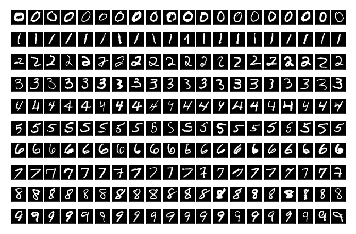

In [130]:
# Display N images for each digit
Dataset.demo(20)

## Random Forest

We'll use RandomForestClassifier from sklearn.

RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, n_jobs=1)

n_estimators: The number of trees in the forest.

criterion: The measure of the quality of a split. “gini” for the Gini impurity and “entropy” for the information gain

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split a node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split. If “auto”, then max_features = sqrt(n_features).

max_leaf_nodes: If None then unlimited number of leaf nodes.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

n_jobs: The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.

In [120]:
# Create an sklearn.ensemble.RandomForestClassifier object
randomforest = RandomForestClassifier(n_estimators=10, n_jobs=-1)
# Train using the training set
randomforest.fit(Dataset.Xtrain, Dataset.ytrain)
# Predict the labels for the validation set
ypred = randomforest.predict(Dataset.Xval)
# Compute the prediction accuracy (%) using the accuracy_score module of the sklearn.metrics
accuracy = accuracy_score(Dataset.yval,ypred) * 100
print("random forest accuracy: ", accuracy) 

random forest accuracy:  94.4761904762


Let's plot the accuracy for different number of trees (note that it takes a while):

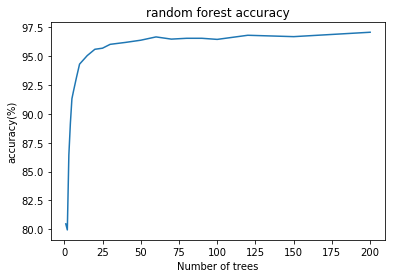

In [125]:
T = np.array([1,2,3,4,5,6,8,10,15,20,25,30,40,50,60,70,80,90,100,120,150,200])
accuracy = np.zeros(T.shape[0])
for i in range(T.shape[0]):
    # Create an sklearn.ensemble.RandomForestClassifier object
    randomforest = RandomForestClassifier(n_estimators=T[i], n_jobs=-1)
    # Train using the training set
    randomforest.fit(Dataset.Xtrain, Dataset.ytrain)
    # Predict the labels for the validation set
    ypred = randomforest.predict(Dataset.Xval)
    # Compute the prediction accuracy (%) using the accuracy_score module of the sklearn.metrics
    accuracy[i] = accuracy_score(Dataset.yval,ypred) * 100
    
# Plot the result
plt.plot(T,accuracy)
plt.title('random forest accuracy'),plt.xlabel('Number of trees'),plt.ylabel('accuracy(%)')
plt.show()

## Support Vector Machine

We'll use LinearSVC from sklearn.svm.

Note that the fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, max_iter=-1)

C: Penalty parameter C of the error term.

kernel: The kernel type to be used. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ or ‘precomputed’. 

degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

coef0: Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

tol: Tolerance for stopping criterion. 

max_iter: Hard limit on iterations within solver, or -1 for no limit.

In [123]:
# Create an sklearn.svm.LinearSVC object
svm = LinearSVC()
# Train using the training set
svm.fit(Dataset.Xtrain, Dataset.ytrain)
# Predict the labels for the validation set
ypred = svm.predict(Dataset.Xval)
# Compute the prediction accuracy (%) using the accuracy_score module of the sklearn.metrics
accuracy = accuracy_score(Dataset.yval,ypred) * 100
print("SVM accuracy: ", accuracy) 

SVM accuracy:  91.4047619048


## Nearest Neighbors

We'll use KNeighborsClassifier from sklearn.neighbors.

KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)

n_neighbors: Number of neighbors to use.

weights: Weight function used in prediction. ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally. ‘distance’ : weight points by the inverse of their distance.

algorithm: Algorithm used to compute the nearest neighbors. ‘brute’ will use a brute-force search.  ‘ball_tree’ will use BallTree. ‘kd_tree’ will use KDTree. 'auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

leaf_size: Leaf size passed to BallTree or KDTree.

p: Power parameter for the distance metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

n_jobs: The number of parallel jobs to run for neighbors search. If -1, then the number of jobs is set to the number of CPU cores. Doesn’t affect fit method.

Note that it is much slower than the algorithms above.

In [127]:
# Create an sklearn.neighbors.KNeighborsClassifier object
knn = KNeighborsClassifier(algorithm='brute')
# Train using the training set
knn.fit(Dataset.Xtrain, Dataset.ytrain)
# Predict the labels for the validation set
ypred = knn.predict(Dataset.Xval)
# Compute the prediction accuracy (%) using the accuracy_score module of the sklearn.metrics
accuracy = accuracy_score(Dataset.yval,ypred) * 100
print("KNN accuracy: ", accuracy)

KNN accuracy:  97.0238095238


# Exploration of Dimensionality Reduction

Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28∗28=784 dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.

Not all vectors in this 784-dimensional space are MNIST digits. Typical points in this space are very different (imagine an space of possible 28x28 gray-scaled images).

Images like MNIST digits are very rare. While the MNIST data points are embedded in 784-dimensional space, they live in a very small subspace. With some slightly harder arguments, we can see that they occupy a lower dimensional subspace.

Let's apply PCA to find a suitable low-dimensional subspace to represent the digits.


In [184]:
import cv2

# Create a feature matrix
D = Dataset.height * Dataset.width
A = np.empty((Dataset.Ntrain, D), dtype=np.float32)
for i in range(Dataset.Ntrain):
    A[i,:] = Dataset.Xtrain[i]

# Compute the mean digit
meanDigit = np.mean(A, axis=0)

# Subtract the mean digit from each feature vector
A = A - meanDigit  

# Calc the covariance matrix (DxD)
C = A.transpose().dot(A)

# Find the eigenvectors/eigenvalues of C
retval, eigenVal, eigenVec = cv2.eigen(C)

# Normalize the L2 norm of each Eigenvector
for i in range(eigenVec.shape[0]):
    eigenVec[i,:] = cv2.normalize(eigenVec[i,:],0,1,cv2.NORM_L2).flatten()

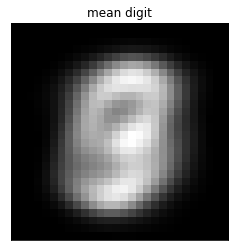

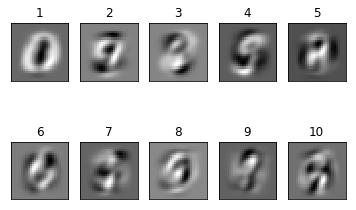

In [185]:
# Display the mean digit
plt.imshow(meanDigit.reshape((Dataset.height,Dataset.width)), cmap='gray'),plt.title("mean digit")
plt.xticks([]), plt.yticks([])
plt.show()

# Display eigen digits
for i in range(10):
    plt.subplot(2,5,i+1),plt.imshow(eigenVec[i,:].reshape((Dataset.height,Dataset.width)), cmap='gray'), plt.title(str(i+1))
    plt.xticks([]), plt.yticks([])
plt.show()

The number of principal components k is determined arbitrarily by setting a threshold ε on the total variance.
Total variance v=n(lambda1+lambda2+...+lambdan), n = number of data images.

k is the smallest number satisfies n(lambda1+lambda2+...+lambdak)/v > ε.

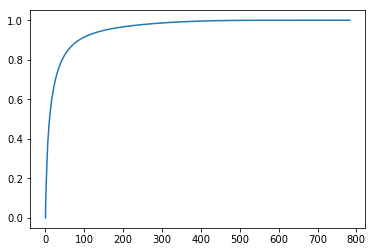

K:  87.0


In [203]:
I = np.zeros(eigenVal.shape[0])
T = np.zeros(eigenVal.shape[0])
v = Dataset.Ntrain * eigenVal.sum()
for i in range(eigenVal.shape[0]):
    I[i] = i
    T[i]= Dataset.Ntrain * eigenVal[0:i].sum() / v

# Plot the result
plt.plot(I,T)
plt.show()    

# Thresholding
thresh = 0.90
T[T < thresh] = 0
K = I[np.nonzero(T)[0][0]]
print('K: ',K)

Computing the projection of all images in the subspace:

In [ ]:
eigenVec = eigenVec[0:K]
for i in range(Dataset.Ntrain):       
    # Project the image to the Eigen space
    Dataset.Xtrain[i] = (Dataset.Xtrain[i] - meanDigit).dot(eigenVec.transpose()) 
    
for i in range(Dataset.Nval):       
    # Project the image to the Eigen space
    Dataset.Xval[i] = (Dataset.Xval[i] - meanDigit).dot(eigenVec.transpose())     